In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./data/data.csv", sep=";")

In [7]:
#Verifico si hay datos nulos
df.isnull().sum()
#Tengo una salida de 0 en todas las columnas, por lo tanto no se tienen datos nulos y se puede comenzar a trabajar con la data

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
#Verifico tipo de datos para ver si se tiene que cambiar alguna columna a otro tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [9]:
#Veo mis 5 primeros datos
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
#Grafica 1: Distribución de estudiantes que abandonan vs graduados

In [11]:
percent_target = df.Target.value_counts(normalize=True)*100

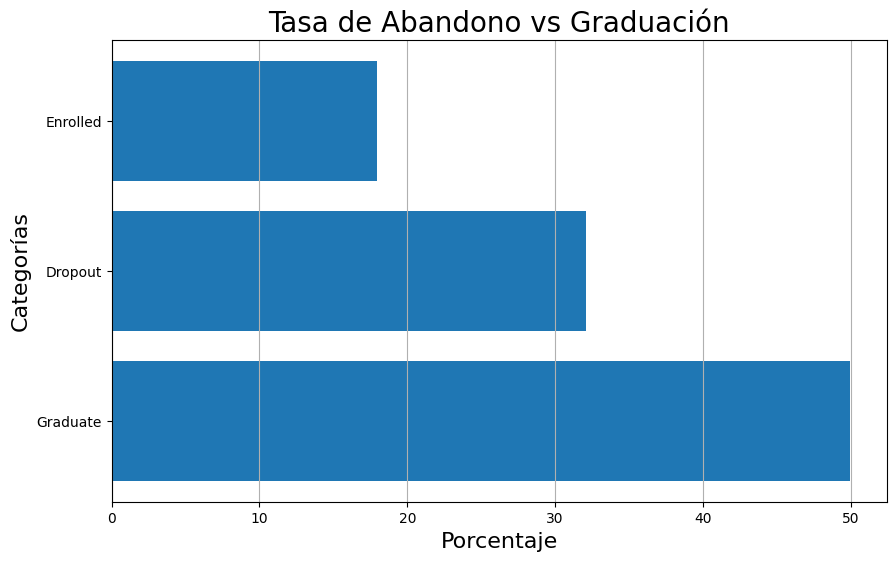

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(percent_target.index, percent_target.values)
plt.title("Tasa de Abandono vs Graduación", fontsize=20)
plt.xlabel("Porcentaje", fontsize=16)
plt.ylabel("Categorías", fontsize=16)
plt.grid(axis="x")


In [13]:
print(f"Análisis del gráfico")
print(f"Se obtuvieron los suientes porcentajes para las categorías de {percent_target}: ")
print("Se observó que la categoría predominante es 'Graduate'. Sin embargo, la proporción de estudiantes que abandonan alcanza un nivel considerablemente elevado. Este porcentaje constituye un indicador de riesgo institucional, lo que justifica la necesidad de identificar los factores que están influyendo en el abandono estudiantil.")



Análisis del gráfico
Se obtuvieron los suientes porcentajes para las categorías de Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64: 
Se observó que la categoría predominante es 'Graduate'. Sin embargo, la proporción de estudiantes que abandonan alcanza un nivel considerablemente elevado. Este porcentaje constituye un indicador de riesgo institucional, lo que justifica la necesidad de identificar los factores que están influyendo en el abandono estudiantil.


In [14]:
#Dado que ya tengo el porcentaje, ahora necesito identificar las causas principales de que los estudiantes abandonen los estudios
#Primera idea: Verificar la cantidad de materias aprobadas en primer semestre para identificar si la cantidad de materias aprobadas determina este abandono

<Axes: xlabel='Target', ylabel='Curricular units 1st sem (approved)'>

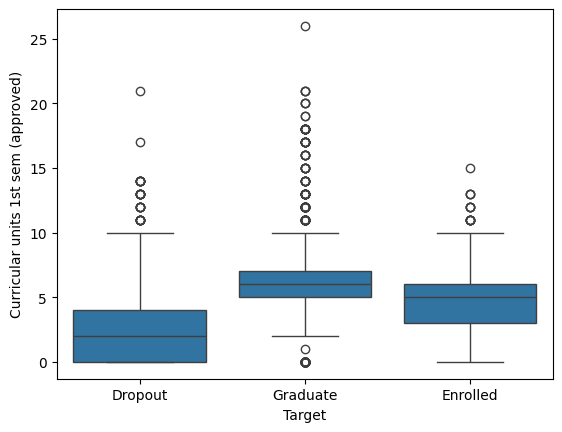

In [15]:
sns.boxplot(data=df, x="Target", y="Curricular units 1st sem (approved)")

In [16]:
#Hallar parámetros importantes (Media, Mediana , IQR)
parameter = df.groupby("Target")["Curricular units 1st sem (approved)"].describe()
print(parameter)
print(" ")
#Hallar el IQR para verificar la variabilidad
IQR = parameter["75%"] - parameter["25%"]
print(IQR) 

           count      mean       std  min  25%  50%  75%   max
Target                                                        
Dropout   1421.0  2.551724  2.857588  0.0  0.0  2.0  4.0  21.0
Enrolled   794.0  4.318640  2.289398  0.0  3.0  5.0  6.0  15.0
Graduate  2209.0  6.232232  2.583380  0.0  5.0  6.0  7.0  26.0
 
Target
Dropout     4.0
Enrolled    3.0
Graduate    2.0
dtype: float64


In [17]:
'''
El grupo Dropout combina bajo rendimiento y alta variabilidad interna, lo que indica múltiples rutas hacia el abandono.

El grupo Graduate muestra alto rendimiento y baja variabilidad, lo que representa un perfil académico estable y exitoso.

Los estudiantes Enrolled se ubican en un punto intermedio en todos los indicadores: media, cuartiles e IQR.

En conjunto, estos resultados apoyan la hipótesis de que el desempeño académico temprano es un predictor crítico del riesgo de abandono.
'''

'\nEl grupo Dropout combina bajo rendimiento y alta variabilidad interna, lo que indica múltiples rutas hacia el abandono.\n\nEl grupo Graduate muestra alto rendimiento y baja variabilidad, lo que representa un perfil académico estable y exitoso.\n\nLos estudiantes Enrolled se ubican en un punto intermedio en todos los indicadores: media, cuartiles e IQR.\n\nEn conjunto, estos resultados apoyan la hipótesis de que el desempeño académico temprano es un predictor crítico del riesgo de abandono.\n'

In [18]:
#Segunda idea:

<Axes: xlabel='Target', ylabel='Curricular units 1st sem (grade)'>

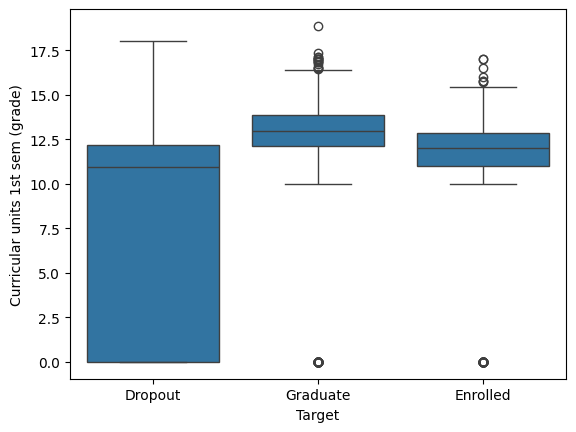

In [19]:
sns.boxplot(data=df, x="Target", y="Curricular units 1st sem (grade)")

In [20]:
#Hallo parámetros importantes (Media, Mediana , IQR)
parameter = df.groupby("Target")["Curricular units 1st sem (grade)"].describe()
print(parameter)
print(" ")
#Hallo el IQR para verificar la variabilidad
print("Rango Intercuartil")
IQR = parameter["75%"] - parameter["25%"]
print(IQR) 

           count       mean       std  min        25%        50%        75%  \
Target                                                                        
Dropout   1421.0   7.256656  6.031120  0.0   0.000000  10.928571  12.200000   
Enrolled   794.0  11.125257  3.675084  0.0  11.000000  12.000000  12.857143   
Graduate  2209.0  12.643655  2.699027  0.0  12.121429  13.000000  13.857143   

             max  
Target            
Dropout   18.000  
Enrolled  17.000  
Graduate  18.875  
 
Rango Intercuartil
Target
Dropout     12.200000
Enrolled     1.857143
Graduate     1.735714
dtype: float64


In [21]:
'''
Los resultados evidencian diferencias significativas en el rendimiento académico del primer semestre entre los tres grupos analizados. El grupo Dropout presenta tanto el promedio más bajo como la mayor variabilidad en las calificaciones (IQR = 12.20), lo que indica un comportamiento altamente heterogéneo donde coexisten estudiantes con desempeño crítico junto con otros de rendimiento moderado. Este patrón sugiere que el abandono no responde únicamente a bajos resultados académicos, sino a un conjunto más amplio de factores. En contraste, los grupos Enrolled y Graduate muestran distribuciones mucho más compactas (IQR = 1.86 y 1.73, respectivamente), lo que refleja un rendimiento estable y consistente. En particular, el grupo Graduate evidencia niveles de logro elevados y homogéneos desde el inicio del proceso formativo, configurando un perfil académico claramente asociado a la continuidad y culminación exitosa de los estudios. En conjunto, estos resultados respaldan la relevancia del desempeño temprano como un indicador crítico de riesgo institucional y de probabilidad de permanencia.
'''

'\nLos resultados evidencian diferencias significativas en el rendimiento académico del primer semestre entre los tres grupos analizados. El grupo Dropout presenta tanto el promedio más bajo como la mayor variabilidad en las calificaciones (IQR = 12.20), lo que indica un comportamiento altamente heterogéneo donde coexisten estudiantes con desempeño crítico junto con otros de rendimiento moderado. Este patrón sugiere que el abandono no responde únicamente a bajos resultados académicos, sino a un conjunto más amplio de factores. En contraste, los grupos Enrolled y Graduate muestran distribuciones mucho más compactas (IQR = 1.86 y 1.73, respectivamente), lo que refleja un rendimiento estable y consistente. En particular, el grupo Graduate evidencia niveles de logro elevados y homogéneos desde el inicio del proceso formativo, configurando un perfil académico claramente asociado a la continuidad y culminación exitosa de los estudios. En conjunto, estos resultados respaldan la relevancia del

In [22]:
#Gráfico 4 : Unidades aprobadas en 2do semestre
#Para el análisis de datos, no es una respuesta el solo analizar la cantidad de unidades aprobadas en 1er semestre, si no que para asegurarnos o al menos darnos una idea más clara, se debe de analizar las de semestre posteriores

<Axes: xlabel='Target', ylabel='Curricular units 2nd sem (approved)'>

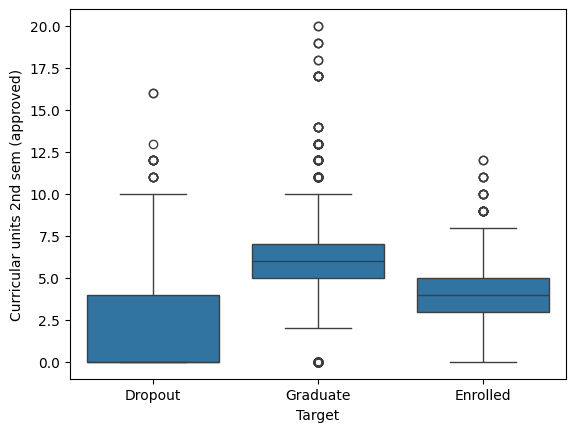

In [26]:
sns.boxplot(data=df, x="Target", y="Curricular units 2nd sem (approved)")

In [28]:
#Hallo parámetros importantes (Media, Mediana , IQR)
parameter = df.groupby("Target")["Curricular units 2nd sem (approved)"].describe()
print(parameter)
print(" ")
#Hallo el IQR para verificar la variabilidad
print("Rango Intercuartil")
IQR = parameter["75%"] - parameter["25%"]
print(IQR) 

           count      mean       std  min  25%  50%  75%   max
Target                                                        
Dropout   1421.0  1.940183  2.573691  0.0  0.0  0.0  4.0  16.0
Enrolled   794.0  4.057935  2.180197  0.0  3.0  4.0  5.0  12.0
Graduate  2209.0  6.177003  2.268622  0.0  5.0  6.0  7.0  20.0
 
Rango Intercuartil
Target
Dropout     4.0
Enrolled    2.0
Graduate    2.0
dtype: float64


In [ ]:
'''
HALLAZGOS CRÍTICOS:

1. COLAPSO EN 2DO SEMESTRE: Los estudiantes que abandonan pasan de aprobar 
   2 materias (1er sem) a 0 materias (2do sem). Esto no es deterioro gradual, 
   es abandono de facto.

2. EL 1ER SEMESTRE ES PREDICTOR PERFECTO: Los estudiantes que aprueban 
   menos de 3 materias en 1er semestre tienen probabilidad extremadamente 
   alta de no aprobar NADA en el 2do semestre.

3. PUNTO DE NO RETORNO: La transición del 1er al 2do semestre marca el 
   punto de no retorno. Las intervenciones deben ocurrir DURANTE o 
   INMEDIATAMENTE DESPUÉS del 1er semestre.

4. PERFIL DE ÉXITO CONSISTENTE: Los graduados aprueban consistentemente 
   6 materias por semestre. Este es lo que define una "trayectoria exitosa".

5. UMBRAL DE ALERTA TEMPRANA: Aprobar ≤2 materias en 1er semestre debe 
   Activar intervención inmediata (tutorías, asesoría, apoyo económico).
'''

In [ ]:
'''
    Ahora, una vez hallado resultados con el ambito de las notas, verificaremos si el tener o no becas afecta en el dropout de los estudiantes
'''

In [ ]:
df["Scholarship holder"].value_counts()
# 0 según la documentación de la data representa no becario y 1 representa becario. En este caso, los contamos para identificar que tantos son.

Scholarship holder
0    3325
1    1099
Name: count, dtype: int64

In [34]:
# Ahora, para mejor visualización, se calculará la tabla de los antes mencionados con el target para identificar que tantos hay en cada categoría
tabla = pd.crosstab(df["Scholarship holder"], df["Target"])
tabla

Target,Dropout,Enrolled,Graduate
Scholarship holder,,,
0,1287,664,1374
1,134,130,835


In [37]:
#La misma tabla, pero con porcentajes
percent_table = pd.crosstab(df["Scholarship holder"], df["Target"], normalize=True)*100
round(percent_table,2)

Target,Dropout,Enrolled,Graduate
Scholarship holder,,,
0,29.09,15.01,31.06
1,3.03,2.94,18.87


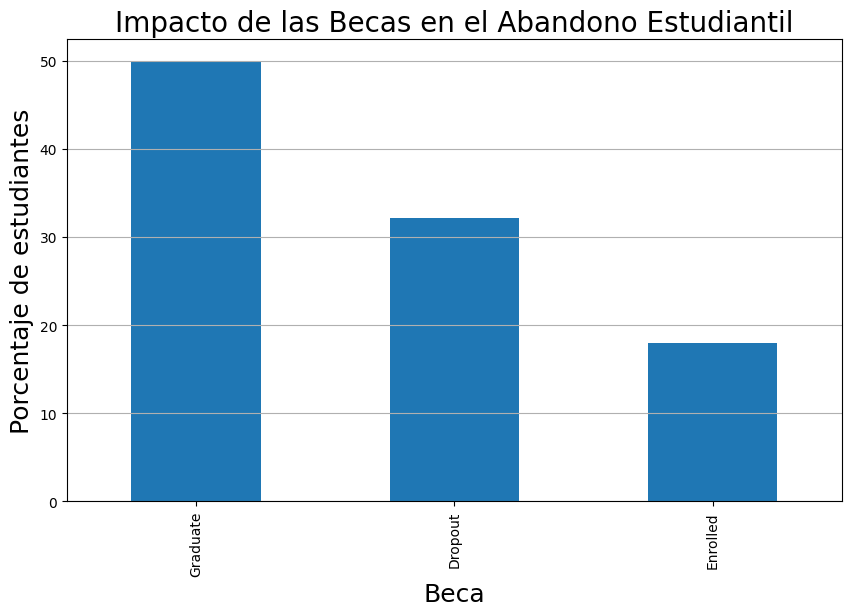

In [42]:
#Realizamos el gráfico, en este caso, elegí el de barrar apiladas para mostrar propoción
ax = percent_target.plot(kind="bar", stacked=True, figsize=(10,6))
ax.set_title("Impacto de las Becas en el Abandono Estudiantil", fontsize=20)
ax.set_xlabel("Beca", fontsize=18)
ax.set_ylabel("Porcentaje de estudiantes", fontsize=18)
plt.grid(axis="y")

In [52]:
#Calculando la tasa abandono de no beca y becado
tasa_no_beca = percent_table.loc[0, 'Dropout']
tasa_beca = percent_table.loc[1, "Dropout"]
diff = tasa_no_beca - tasa_beca
print(f"Tasa de abandono SIN beca: {tasa_no_beca:.2f}%")
print(f"Tasa de abandono CON beca: {tasa_beca:.2f}%")
print(f"Reducción del abandono gracias a las becas: {diff:.2f} puntos porcentuales")
print(f"Factor de riesgo: Los no becarios tienen {tasa_no_beca/tasa_beca:.1f}x más probabilidad de abandonar") 


Tasa de abandono SIN beca: 29.09%
Tasa de abandono CON beca: 3.03%
Reducción del abandono gracias a las becas: 26.06 puntos porcentuales
Factor de riesgo: Los no becarios tienen 9.6x más probabilidad de abandonar


In [ ]:
#Hallazgos
'''
1. IMPACTO MASIVO DE LAS BECAS: Las becas reducen la tasa de abandono en 
   26 puntos porcentuales (de 29% a 3%). Este es uno de los factores 
   protectores MÁS FUERTES identificados en el análisis.

2. RIESGO RELATIVO: Los estudiantes sin beca tienen 9.6 veces más 
   probabilidad de abandonar que los becarios. El factor económico es 
   tan crítico como el rendimiento académico.

3. EFICACIA DE LA INTERVENCIÓN: Con solo 3% de abandono, los becarios 
   tienen tasas comparables o mejores que el promedio general de graduados. 
   Las becas no solo previenen el abandono, sino que crean condiciones 
   para el éxito académico.

4. POLÍTICA INSTITUCIONAL: Expandir el programa de becas es una estrategia 
   de retención altamente efectiva y medible. Cada beca otorgada reduce 
   significativamente la probabilidad de abandono.

5. INTERACCIÓN CON FACTORES ACADÉMICOS: Sería valioso explorar si las 
   becas también se asocian con mejor rendimiento académico, o si protegen
'''

In [63]:
#Impacto de las deudas en el abandono, donde 0 es no deudor y 1 es deudor
df["Debtor"].value_counts()
print(df["Debtor"].value_counts(normalize=True)*100)

Debtor
0    88.630199
1    11.369801
Name: proportion, dtype: float64


In [65]:
print(f"Solo el 11.37% de los estudiantes tiene deudas.")
print(f"Esto confirma que tener deudas es un indicador de permanencia en el sistema,")
print(f"no un factor de riesgo. Los estudiantes abandonan antes de acumular deudas.")

Solo el 11.37% de los estudiantes tiene deudas.
Esto confirma que tener deudas es un indicador de permanencia en el sistema,
no un factor de riesgo. Los estudiantes abandonan antes de acumular deudas.


In [60]:
#Creamos la tabla cruzada para analizar estos datos con respecto al target
tabla_deudas = pd.crosstab(df["Debtor"], df["Target"])
tabla_deudas_percent = round(pd.crosstab(df["Debtor"], df["Target"], normalize=True)*100,2)
tabla_deudas_percent

Target,Dropout,Enrolled,Graduate
Debtor,,,
0,25.07,15.91,47.65
1,7.05,2.03,2.28


In [61]:
# Tasa de abandono sin deudas (0)
tasa_no_deudor = tabla_deudas_percent.loc[0, 'Dropout']

# Tasa de abandono con deudas (1)
tasa_deudor = tabla_deudas_percent.loc[1, 'Dropout']

# Diferencia
diff_deudas = tasa_deudor - tasa_no_deudor 

print(f"Tasa de abandono SIN deudas: {tasa_no_deudor:.2f}%")
print(f"Tasa de abandono CON deudas: {tasa_deudor:.2f}%")
print(f"Incremento del abandono por deudas: {diff_deudas:.2f} puntos porcentuales")

Tasa de abandono SIN deudas: 25.07%
Tasa de abandono CON deudas: 7.05%
Incremento del abandono por deudas: -18.02 puntos porcentuales


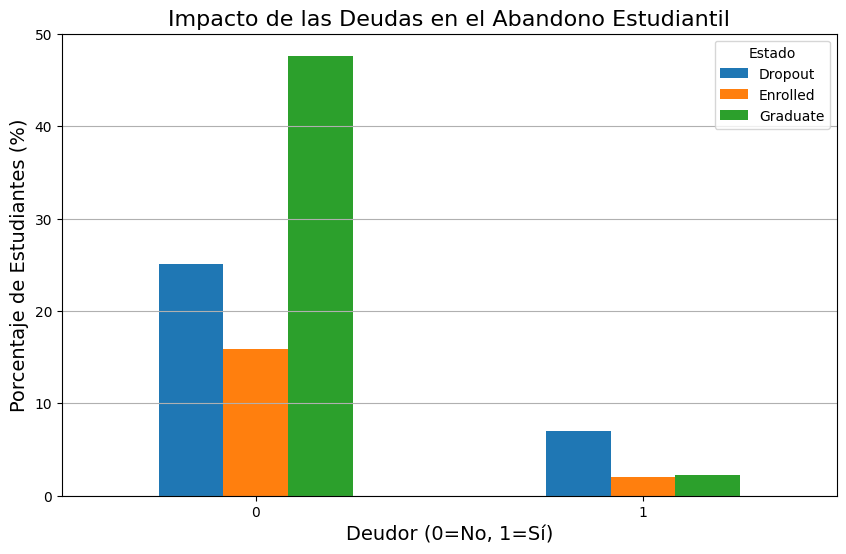

In [ ]:
# Barras agrupadas o apiladas
tabla_deudas_percent.plot(kind='bar', figsize=(10,6))
plt.title("Impacto de las Deudas en el Abandono Estudiantil", fontsize=16)
plt.xlabel("Deudor (0=No, 1=Sí)", fontsize=14)
plt.ylabel("Porcentaje de Estudiantes (%)", fontsize=14)
plt.xticks(rotation=0)  
plt.legend(title='Estado')
plt.grid(axis='y')
plt.show()

In [ ]:
'''
1. RESULTADO INESPERADO: Contrario a la hipótesis inicial, los estudiantes 
   CON deudas presentan MENOR tasa de abandono (7.05%) que aquellos SIN 
   deudas (25.07%). La diferencia es de -18.02 puntos porcentuales.

2. INTERPRETACIÓN - COMPROMISO FINANCIERO: Este patrón sugiere que tener 
   deudas puede ser un indicador de COMPROMISO con los estudios más que un 
   factor de riesgo. Los estudiantes que invierten financieramente tienen 
   mayor motivación para completar sus estudios y recuperar su inversión.

3. SESGO DE SELECCIÓN: Los estudiantes que abandonan (25% sin deudas) 
   probablemente lo hacen TAN temprano en su trayectoria académica que no 
   llegan a acumular deudas significativas. Las deudas se acumulan con el 
   tiempo, indicando permanencia en el sistema.

4. CONTRASTE CON BECAS: Mientras las becas reducen el abandono eliminando 
   barreras económicas (3% vs 29%), las deudas parecen reflejar el nivel 
   de compromiso del estudiante. Son factores económicos con mecanismos 
   diferentes:
   - Becas = Factor PROTECTOR (reduce abandono 26pp)
   - Deudas = Indicador de COMPROMISO (asociado a 18pp menos abandono)

5. IMPLICACIÓN PRÁCTICA: La presencia de deudas NO debe interpretarse como 
   factor de riesgo de abandono. Sin embargo, esto NO implica que las 
   políticas de endeudamiento estudiantil sean deseables - las becas siguen 
   siendo la estrategia más efectiva y ética para retención estudiantil.

6. CONTEXTO CUANTITATIVO: Solo el 11.37% de los estudiantes tiene deudas, 
   lo que confirma que acumular deudas requiere permanencia en el sistema. 
   La mayoría (88.63%) no tiene deudas, incluyendo tanto a estudiantes 
   becados como a aquellos que abandonan tempranamente antes de incurrir 
   en costos significativos.

7. GRUPO DE ALTO RIESGO IDENTIFICADO: El perfil de mayor riesgo no es el 
   estudiante con deudas (7% abandono), sino aquel sin beca y sin deudas, 
   que probablemente enfrenta barreras económicas y abandona en las 
   primeras etapas sin invertir financieramente en su educación.
'''

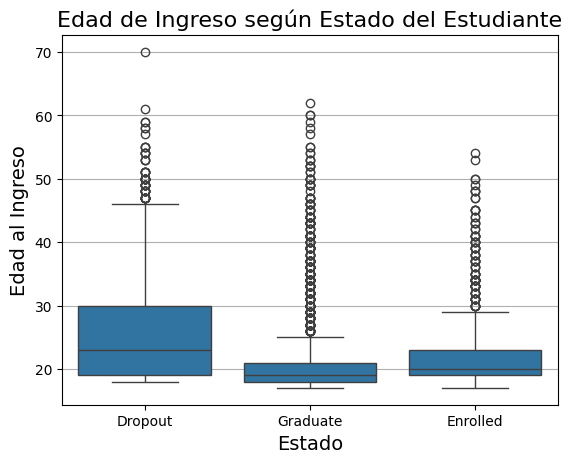

In [66]:
# Gráfico 8: Edad al Ingreso vs Abandono
sns.boxplot(data=df, x='Target', y='Age at enrollment')
plt.title("Edad de Ingreso según Estado del Estudiante", fontsize=16)
plt.xlabel("Estado", fontsize=14)
plt.ylabel("Edad al Ingreso", fontsize=14)
plt.grid(axis='y')
plt.show()

In [67]:
# Estadísticas
stats_edad = df.groupby('Target')['Age at enrollment'].describe()
print(stats_edad)

# IQR
IQR_edad = stats_edad['75%'] - stats_edad['25%']
print("\nRango Intercuartil:")
print(IQR_edad)

           count       mean       std   min   25%   50%   75%   max
Target                                                             
Dropout   1421.0  26.068966  8.704024  18.0  19.0  23.0  30.0  70.0
Enrolled   794.0  22.369018  6.302672  17.0  19.0  20.0  23.0  54.0
Graduate  2209.0  21.783612  6.693218  17.0  18.0  19.0  21.0  62.0

Rango Intercuartil:
Target
Dropout     11.0
Enrolled     4.0
Graduate     3.0
dtype: float64


In [ ]:
'''
FACTOR DEMOGRÁFICO - EDAD AL INGRESO:

1. DIFERENCIA SIGNIFICATIVA: Los estudiantes que abandonan ingresan en 
   promedio 4 años mayores que los que se gradúan (26 vs 22 años, 
   mediana 23 vs 19). La edad es un predictor relevante de abandono.

2. PERFIL DE ÉXITO HOMOGÉNEO: Los graduados muestran un perfil muy 
   consistente (IQR=3): típicamente ingresan entre 18-21 años, recién 
   egresados de educación secundaria, sin interrupciones educativas.

3. ESTUDIANTE NO TRADICIONAL EN RIESGO: Los estudiantes que ingresan 
   con 25+ años tienen mayor riesgo de abandono, probablemente debido a 
   responsabilidades laborales, familiares y económicas que compiten con 
   los estudios.

4. VARIABILIDAD ALTA EN DROPOUT: El grupo que abandona muestra alta 
   heterogeneidad (IQR=11), incluyendo tanto jóvenes con bajo rendimiento 
   como adultos mayores con limitaciones de tiempo/recursos.

5. IMPLICACIÓN PRÁCTICA: Los estudiantes no tradicionales (>23 años) 
   requieren apoyos diferenciados: horarios flexibles, modalidades 
   semipresenciales, servicios de guardería, o programas acelerados que 
   reconozcan su experiencia laboral.
Conclusión: La edad es relevante pero MENOS determinante que 
becas y rendimiento académico.
'''

In [68]:
''' Variables numéricas relevantes para el análisis
'''
variables_numericas = [
    'Age at enrollment',
    'Previous qualification (grade)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Scholarship holder',
    'Debtor',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

In [69]:
# Calcular matriz de correlación
correlacion = df[variables_numericas].corr()

# Ver la matriz (opcional, para verificar)
print(correlacion)

                                     Age at enrollment  \
Age at enrollment                             1.000000   
Previous qualification (grade)               -0.111377   
Curricular units 1st sem (enrolled)           0.141327   
Curricular units 1st sem (approved)          -0.053405   
Curricular units 1st sem (grade)             -0.156616   
Curricular units 2nd sem (enrolled)           0.085914   
Curricular units 2nd sem (approved)          -0.112052   
Curricular units 2nd sem (grade)             -0.173419   
Scholarship holder                           -0.189917   
Debtor                                        0.098793   
Unemployment rate                             0.025018   
Inflation rate                                0.025377   
GDP                                          -0.064678   

                                     Previous qualification (grade)  \
Age at enrollment                                         -0.111377   
Previous qualification (grade)               

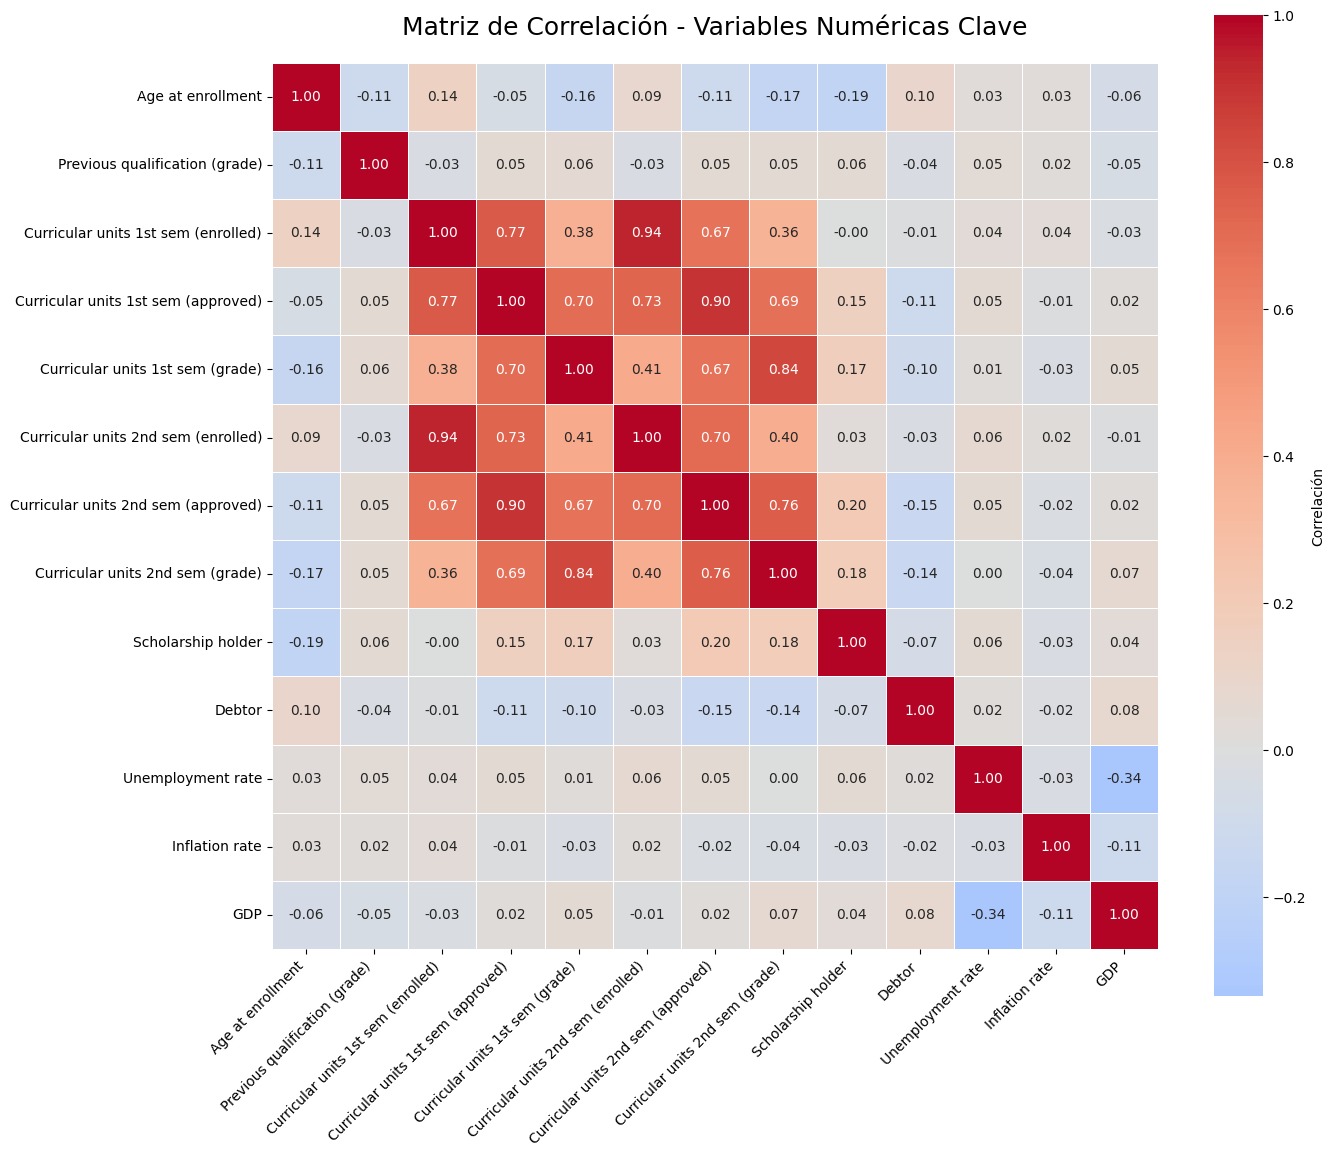

In [70]:
# Crear figura con buen tamaño
plt.figure(figsize=(14, 12))

# Crear heatmap
sns.heatmap(correlacion, 
            annot=True,           # Mostrar valores numéricos
            fmt='.2f',            # Formato: 2 decimales
            cmap='coolwarm',      # Paleta de colores (rojo=positivo, azul=negativo)
            center=0,             # Centro en 0
            square=True,          # Celdas cuadradas
            linewidths=0.5,       # Líneas entre celdas
            cbar_kws={'label': 'Correlación'})  # Etiqueta de barra de color

plt.title("Matriz de Correlación - Variables Numéricas Clave", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar etiquetas X
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Crear máscara para la diagonal y duplicados
import numpy as np
mask = np.triu(np.ones_like(correlacion, dtype=bool))

# Filtrar valores 
corr_sin_diagonal = correlacion.where(~mask)

# Encontrar las 10 correlaciones más fuertes 
corr_ordenadas = corr_sin_diagonal.abs().unstack().sort_values(ascending=False)
print("Top 10 Correlaciones más Fuertes:")
print(corr_ordenadas.head(10))

Top 10 Correlaciones más Fuertes:
Curricular units 1st sem (enrolled)  Curricular units 2nd sem (enrolled)    0.942627
Curricular units 1st sem (approved)  Curricular units 2nd sem (approved)    0.904002
Curricular units 1st sem (grade)     Curricular units 2nd sem (grade)       0.837170
Curricular units 1st sem (enrolled)  Curricular units 1st sem (approved)    0.769083
Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)       0.760804
Curricular units 1st sem (approved)  Curricular units 2nd sem (enrolled)    0.733772
Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (approved)    0.703258
Curricular units 1st sem (approved)  Curricular units 1st sem (grade)       0.696113
                                     Curricular units 2nd sem (grade)       0.685560
Curricular units 1st sem (enrolled)  Curricular units 2nd sem (approved)    0.673341
dtype: float64


In [ ]:
'''
HALLAZGOS DE LA MATRIZ DE CORRELACIÓN:

1. PREDICCIÓN PERFECTA: Las correlaciones más fuertes (0.84-0.94) son todas 
   entre variables académicas del 1er y 2do semestre. Esto CONFIRMA que el 
   rendimiento del 1er semestre predice casi perfectamente el 2do semestre.

2. CONSISTENCIA ACADÉMICA: Los estudiantes mantienen patrones estables:
   - Materias aprobadas 1er→2do: r=0.90
   - Calificaciones 1er→2do: r=0.84
   
   Los buenos estudiantes siguen siendo buenos; los que luchan siguen luchando.

3. AUSENCIA DE CORRELACIONES FUERTES CON FACTORES NO ACADÉMICOS:
   Becas, edad y deudas NO muestran correlaciones lineales fuertes con 
   rendimiento. Esto sugiere que actúan como:
   - Facilitadores/barreras (becas)
   - Factores de contexto (edad, responsabilidades)
   - Indicadores indirectos (deudas = compromiso)
   
   Más que como predictores directos del desempeño.

4. IMPLICACIÓN CRÍTICA: 
   El sistema de alerta temprana debe enfocarse EXCLUSIVAMENTE en el 
   rendimiento del 1er semestre. Los factores socioeconómicos y demográficos 
   sirven para identificar estudiantes que necesitan APOYO PREVENTIVO, 
   pero el rendimiento académico temprano es el indicador definitivo.
'''